## Limpando Texto de Tweets

In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.util import ngrams
import nltk
%matplotlib inline

In [2]:
def create_wordcloud(text, title):    
    wordcloud = WordCloud(max_font_size=30, max_words=200, background_color="black",colormap = 'Accent',stopwords = set(STOPWORDS)).generate(text)
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title.title())
    plt.axis("off")
    plt.show()
    
def create_corpus(input_text):
    # Taken and amended from this notebook https://www.kaggle.com/madz2000/nlp-using-glove-embeddings-99-87-accuracy
    # Full credits to the author    
    list_of_words = []
    for single_text in input_text:
        for word in single_text.split():
            list_of_words.append(word.strip())
    return list_of_words
    

In [3]:
df = pd.read_csv('../data/interim/tweets_aos_fatos_saude.csv')

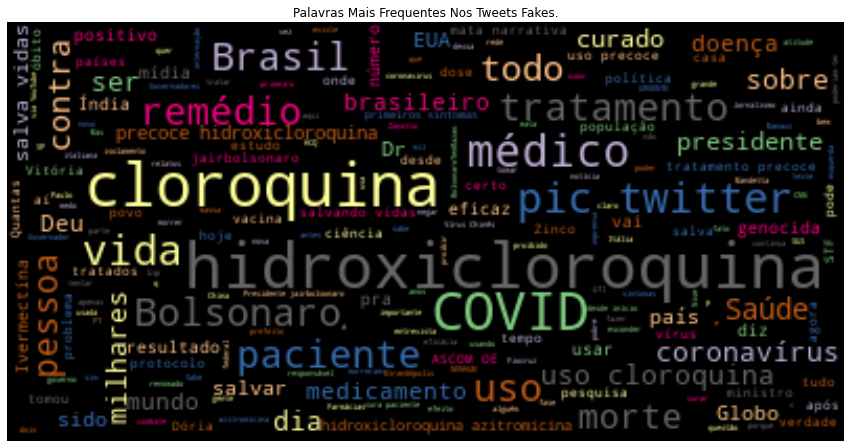

In [4]:
create_wordcloud(
    text = ' '.join(text for text in df.loc[df['desinfo'] == 0, 'tweet']),
    title = 'Palavras mais frequentes nos tweets fakes.'
)

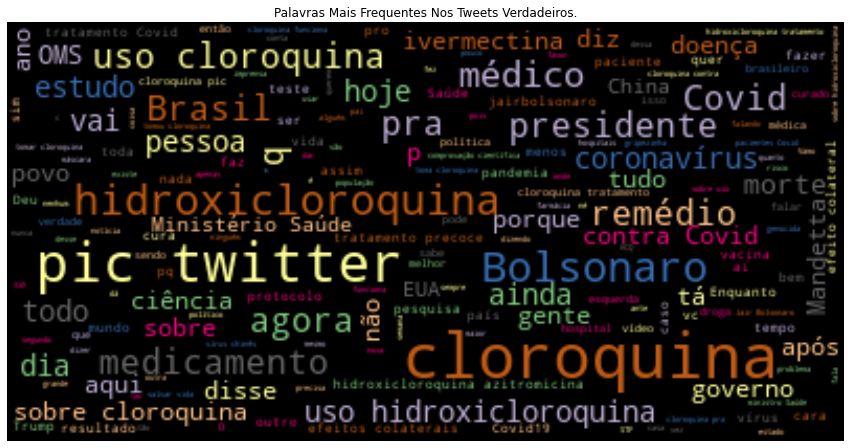

In [5]:
create_wordcloud(
    text = ' '.join(text for text in df.loc[df['desinfo'] == 1, 'tweet']),
    title = 'Palavras mais frequentes nos tweets verdadeiros.'
)

In [6]:
data = df.copy()
data.desinfo = data.desinfo.map({1: 'Verdadeira', 0: 'Falsa'})

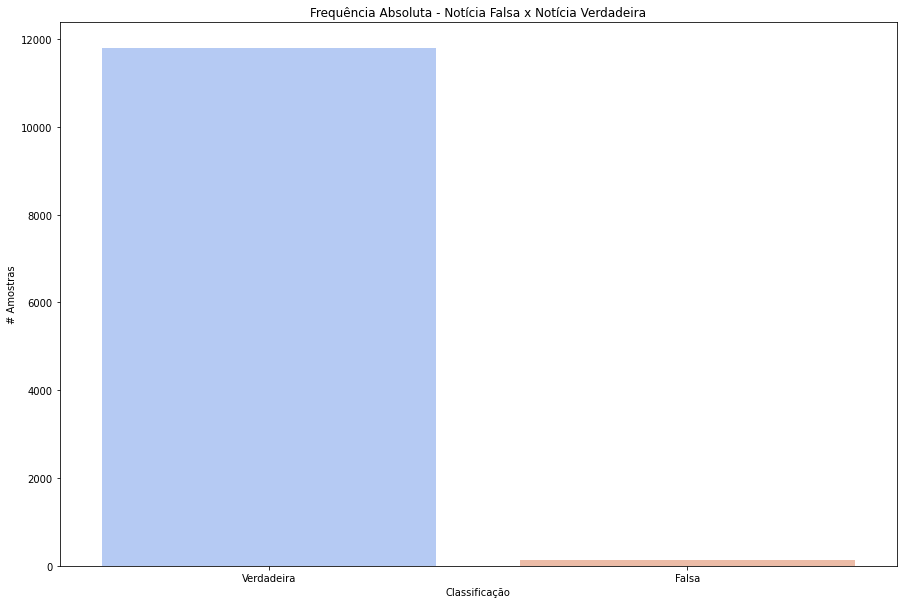

In [7]:
figure = plt.figure(figsize=(15,10))
fig = sns.countplot(x = 'desinfo', data=data, palette='coolwarm')
fig.set_xlabel('Classificação')
fig.set_ylabel('# Amostras')
fig.set_title('Frequência Absoluta - Notícia Falsa x Notícia Verdadeira')

plt.show()

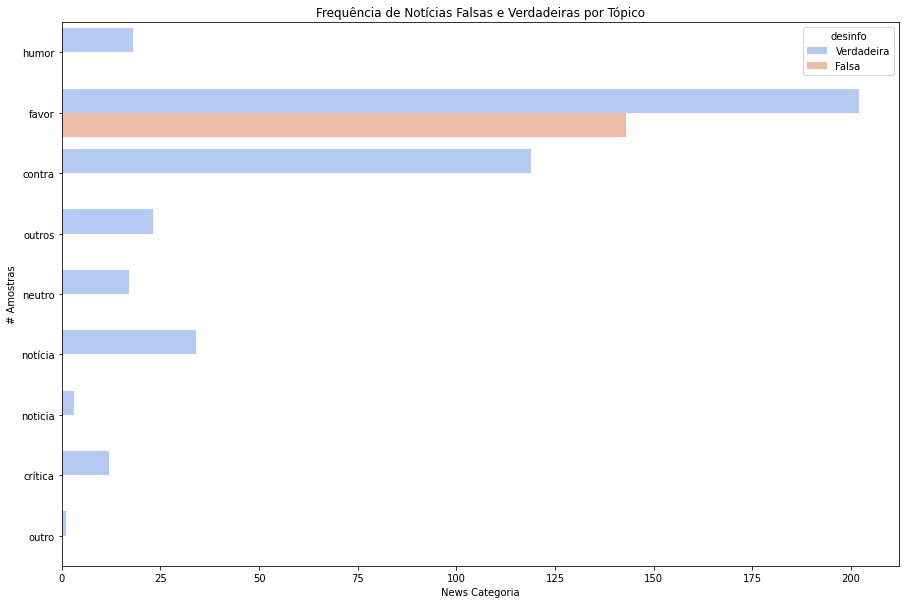

In [8]:
figure = plt.figure(figsize=(15,10))
fig = sns.countplot(y='categoria', hue='desinfo', data=data, palette='coolwarm')
fig.set_xlabel('News Categoria')
fig.set_ylabel('# Amostras')
fig.set_title('Frequência de Notícias Falsas e Verdadeiras por Tópico')
plt.show()

In [9]:
data.loc[data.desinfo == 'Falsa', 'tweet'].apply(len).mean(), data.loc[data.desinfo == 'Verdadeira', 'tweet'].apply(len).mean(),

(165.0909090909091, 145.88898312272073)

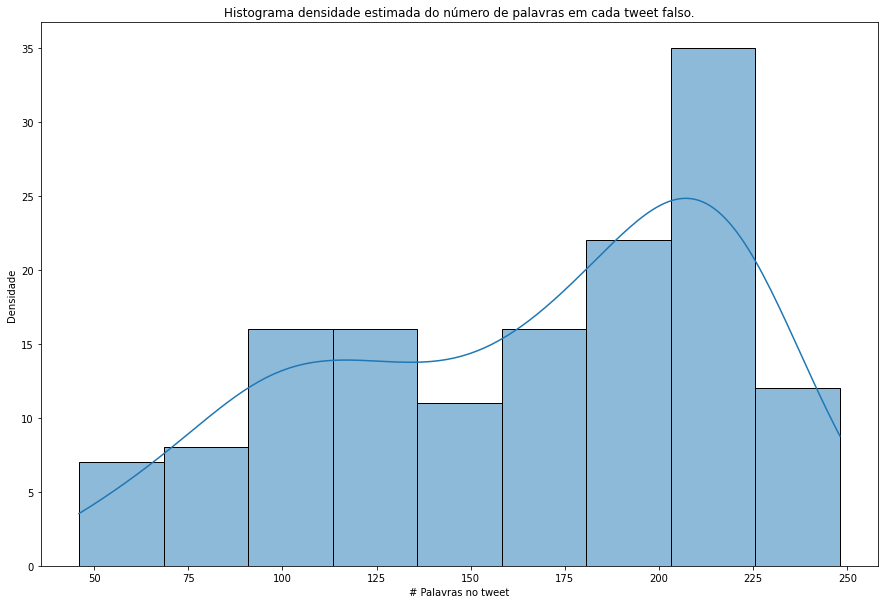

In [10]:
figure = plt.figure(figsize=(15,10))
fig = sns.histplot(data.loc[data.desinfo == 'Falsa', 'tweet'].apply(len), label='desinfo', kde=True)
fig.set_xlabel('# Palavras no tweet')
fig.set_ylabel('Densidade')
fig.set_title('Histograma densidade estimada do número de palavras em cada tweet falso.')
plt.show()

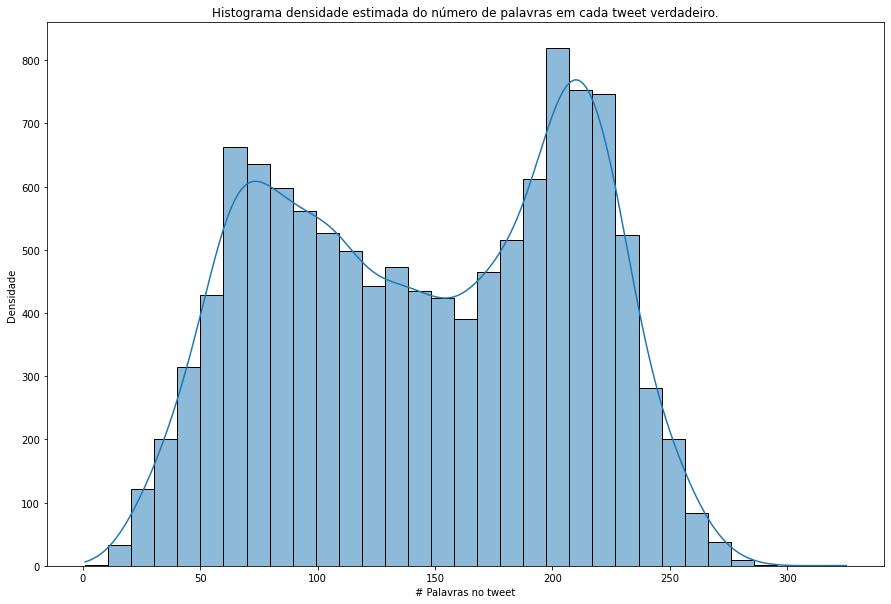

In [11]:
figure = plt.figure(figsize=(15,10))
fig = sns.histplot(data.loc[data.desinfo == 'Verdadeira', 'tweet'].apply(len), label='desinfo', kde=True)
fig.set_xlabel('# Palavras no tweet')
fig.set_ylabel('Densidade')
fig.set_title('Histograma densidade estimada do número de palavras em cada tweet verdadeiro.')
plt.show()

In [12]:
print(f"Média de palavras Tweets Verdadeiros: {data.loc[data.desinfo == 'Verdadeira', 'tweet'].apply(len).mean()}")
print(f"Média de palavras Tweets Falsos: {data.loc[data.desinfo == 'Falsa', 'tweet'].apply(len).mean()}")

Média de palavras Tweets Verdadeiros: 145.88898312272073
Média de palavras Tweets Falsos: 165.0909090909091


In [13]:
corpus = create_corpus(df.tweet)

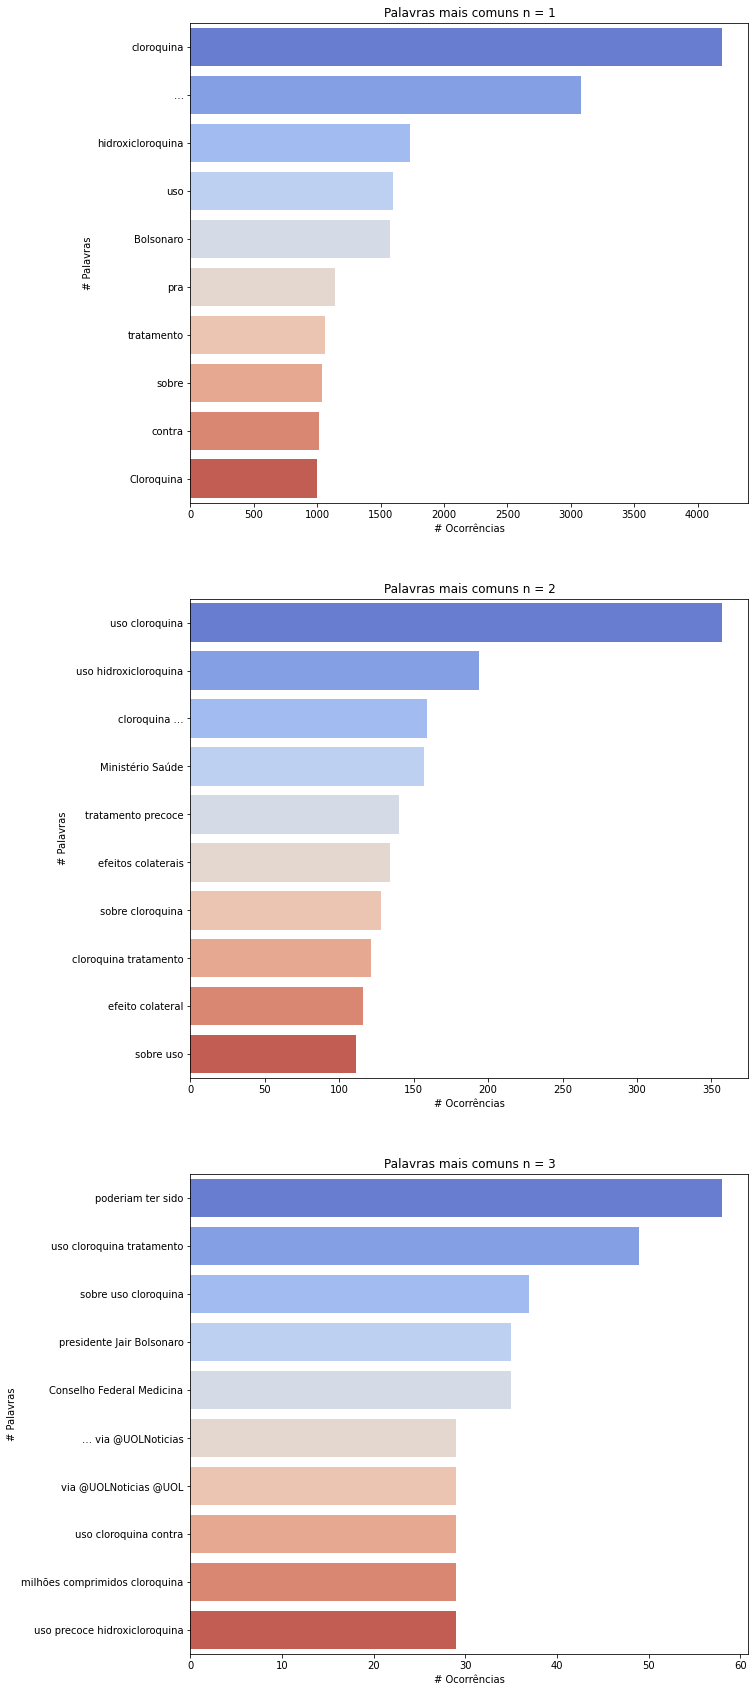

In [14]:
n_grams_n = [1,2,3]
n_top_common = 10
fig, axes = plt.subplots(3,1,figsize=(10,30))

for idx in range(len(n_grams_n)):    
    bag = [ ' '.join(grams) for grams in list(ngrams(corpus,n_grams_n[idx]))]
    f_dict = nltk.FreqDist(bag)
    most_common_list = f_dict.most_common(n_top_common)
    keys = [el[0] for el in most_common_list]
    values = [el[1] for el in most_common_list]
    temp = pd.DataFrame(data = {'keys':keys,'values': values})
    
    sns.barplot(x="values", y="keys", data=temp , palette='coolwarm', ax = axes[idx])
    axes[idx].set_xlabel('# Ocorrências')
    axes[idx].set_ylabel('# Palavras')
    axes[idx].set_title(f'Palavras mais comuns n = {str(n_grams_n[idx])}')

In [15]:
print(f"Popularidade média dos Tweets Verdadeiros: {data.loc[data.desinfo == 'Verdadeira', 'popularidade'].mean()}")
print(f"Popularidade média dos Tweets Falsos: {data.loc[data.desinfo == 'Falsa', 'popularidade'].mean()}")

Popularidade média dos Tweets Verdadeiros: 2934.205410906624
Popularidade média dos Tweets Falsos: 20581.46153846154


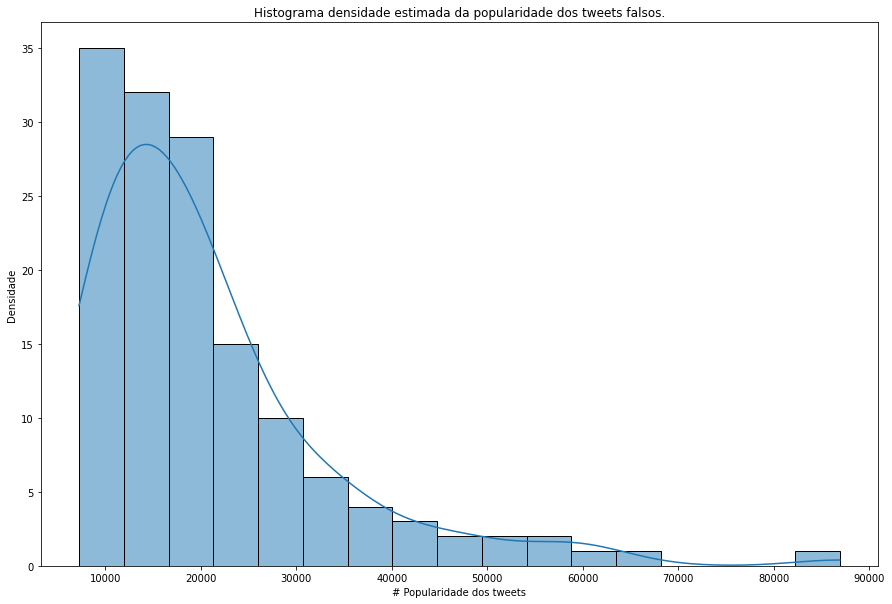

In [16]:
figure = plt.figure(figsize=(15,10))
fig = sns.histplot(data.loc[data.desinfo == 'Falsa', 'popularidade'], label='desinfo', kde=True)
fig.set_xlabel('# Popularidade dos tweets')
fig.set_ylabel('Densidade')
fig.set_title('Histograma densidade estimada da popularidade dos tweets falsos.')
plt.show()

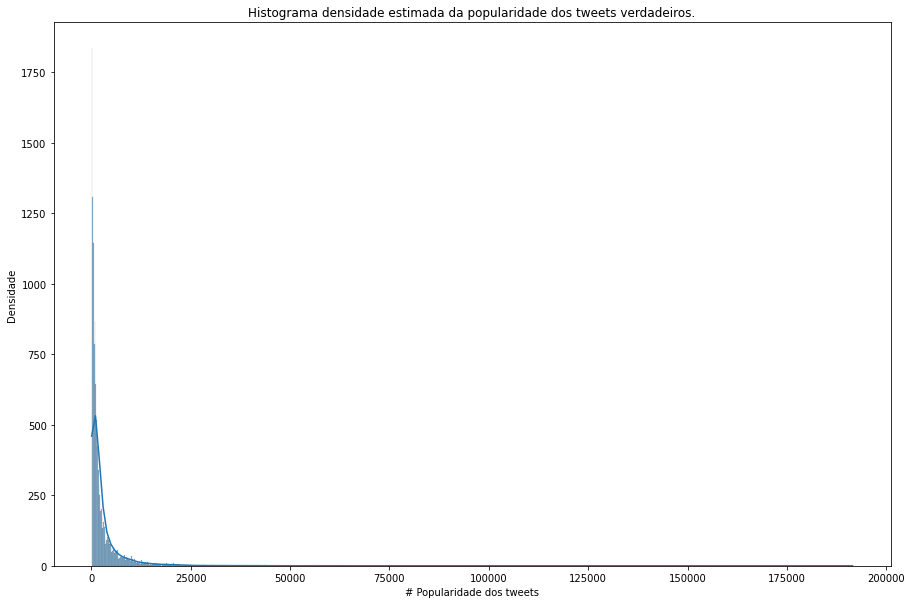

In [17]:
figure = plt.figure(figsize=(15,10))
fig = sns.histplot(data.loc[data.desinfo == 'Verdadeira', 'popularidade'], label='desinfo', kde=True)
fig.set_xlabel('# Popularidade dos tweets')
fig.set_ylabel('Densidade')
fig.set_title('Histograma densidade estimada da popularidade dos tweets verdadeiros.')
plt.show()

In [18]:
t = data.loc[data.desinfo == 'Falsa']
t = t.loc[t.popularidade > t.popularidade.mean(), :].sort_values(by='popularidade', ascending=False)
t

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,urls,replies_count,retweets_count,likes_count,hashtags,link,retweet,quote_url,reply_to,popularidade
2,1247841684584640512,1247841684584640512,1586343616000,2020-04-08 00:00:00,08:00:16,GMT-3,128372940,jairbolsonaro,Jair M. Bolsonaro,1- 40 dias venho falando uso Hidroxicloroquina...,...,NaN,8656,14642,72280,NaN,https://twitter.com/jairbolsonaro/status/12478...,False,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",86922
5975,1272985282904801286,1272985282904801286,1592338317000,2020-06-16,17:11:57,GMT-3,128372940,jairbolsonaro,Jair M. Bolsonaro,"contrário divulgou mídia brasileira, retirada ...",...,NaN,5292,12971,50752,NaN,https://twitter.com/jairbolsonaro/status/12729...,False,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",63723
8,1244399453093724169,1244399453093724169,1585522924000,2020-03-29 00:00:00,20:02:04,GMT-3,128372940,jairbolsonaro,Jair M. Bolsonaro,Hidroxicloroquina cada vez demonstra eficácia ...,...,['https://youtu.be/vYLIRzhJIoY'],6506,11508,47391,NaN,https://twitter.com/jairbolsonaro/status/12443...,False,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",58899
9,1243683282656559104,1243683282656559104,1585352175000,2020-03-27 00:00:00,20:36:15,GMT-3,128372940,jairbolsonaro,Jair M. Bolsonaro,Cada vez Hidroxicloroquina demonstra ser reméd...,...,NaN,4549,10673,47751,NaN,https://twitter.com/jairbolsonaro/status/12436...,False,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",58424
10,1247625049894539276,1247625049894539276,1586291966000,2020-04-07 00:00:00,17:39:26,GMT-3,33520195,rconstantino,Rodrigo Constantino,Hidroxicloroquina liberada todos pacientes. Vi...,...,NaN,3093,9785,48122,NaN,https://twitter.com/Rconstantino/status/124762...,False,NaN,"[{'user_id': '33520195', 'username': 'Rconstan...",57907
5843,1269375294827368450,1269375294827368450,1591477628000,2020-06-06,18:07:08,GMT-3,1084712593292443648,majorfabianadep,Major Fabiana,Pedir desculpas porque forjaram estudo cloroqu...,...,NaN,838,8998,41778,NaN,https://twitter.com/majorfabianadep/status/126...,False,NaN,"[{'user_id': '1084712593292443648', 'username'...",50776
15,1247841886917791745,1247841684584640512,1586343664000,2020-04-08 00:00:00,08:01:04,GMT-3,128372940,jairbolsonaro,Jair M. Bolsonaro,2- Cada vez uso Cloroquina apresenta algo efic...,...,NaN,1975,7193,42628,NaN,https://twitter.com/jairbolsonaro/status/12478...,False,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",49821
5981,1276001275537211393,1276001275537211393,1593057385000,2020-06-25,00:56:25,GMT-3,61251074,oswaldojor,Oswaldo Eustáquio,"URGENTE: Após protocolo Cloroquina, Brasil ult...",...,NaN,715,13366,33592,NaN,https://twitter.com/oswaldojor/status/12760012...,False,NaN,"[{'user_id': '61251074', 'username': 'oswaldoj...",46958
7963,1287005143456784384,1287005143456784384,1595680912000,2020-07-25,09:41:52,GMT-3,52048790,allanldsantos,Allan Dos Santos 🇧🇷🇺🇸,Hidroxicloroquina venceu. Presidente @jairbols...,...,NaN,939,6747,38773,['#perfildeatleta'],https://twitter.com/allanldsantos/status/12870...,False,NaN,"[{'user_id': '52048790', 'username': 'allanlds...",45520
7965,1283381572155121665,1283381572155121665,1594816985000,2020-07-15,09:43:05,GMT-3,751471278968758272,olavoopressor,Olavo de Carvalho,França primeiro-ministro ministro Saúde vetara...,...,NaN,910,8314,34820,NaN,https://twitter.com/OlavoOpressor/status/12833...,False,NaN,"[{'user_id': '751471278968758272', 'username':...",43134


In [19]:
for idx, row in t.head().iterrows():
    print(row['tweet'], '\n')

1- 40 dias venho falando uso Hidroxicloroquina tratamento COVID-19. Sempre busquei tratar vida pessoas 1° lugar, preocupando preservar empregos. Fiz, longo desse tempo, contato dezenas médicos chefes estados outros países. 

contrário divulgou mídia brasileira, retirada status "uso emergencial hospitalar" FDA verdade AMPLIA tratamento hidroxicloroquina EUA, permitindo uso medicamento, antes restrito, qualquer ambiente, desde receitado médico. pic.twitter.com/DVyF8lZJ6g 

Hidroxicloroquina cada vez demonstra eficácia portadores COVID-19. recebido relatos todo Brasil nesse sentido. Preservar vidas empregos. pic.twitter.com/YdP4h3FsD1 

Cada vez Hidroxicloroquina demonstra ser remédio eficaz contra Covid-19. pic.twitter.com/YMwNj5hytI 

Hidroxicloroquina liberada todos pacientes. Vitória Bolsonaro. Vitória ciência. Derrota torcedores corona... 

